<a href="https://colab.research.google.com/github/wjdolan/DS_Portfolio/blob/main/MonteCarlo_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo to Predict Stock Price

In [3]:
#!pip install yfinance

In [4]:

import yfinance as yf
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [5]:
ticker = yf.Ticker('SPY')

start_date = '2014-01-01'
end_date = '2022-12-31'

hist = ticker.history(start=start_date, end=end_date)
print(hist.head())

                                 Open        High         Low       Close  \
Date                                                                        
2014-01-02 00:00:00-05:00  155.887615  155.963883  154.616654  154.989471   
2014-01-03 00:00:00-05:00  155.252162  155.565675  154.743785  154.964081   
2014-01-06 00:00:00-05:00  155.472476  155.531781  154.277770  154.515015   
2014-01-07 00:00:00-05:00  155.133525  155.726637  155.014902  155.463974   
2014-01-08 00:00:00-05:00  155.438577  155.760558  154.964086  155.497894   

                              Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                          
2014-01-02 00:00:00-05:00  119636900        0.0           0.0            0.0  
2014-01-03 00:00:00-05:00   81390600        0.0           0.0            0.0  
2014-01-06 00:00:00-05:00  108028200        0.0           0.0            0.0  
2014-01-07 00:00:00-05:00   86144200        0.0           0.0    

In [6]:
hist = hist[['Close']]
print(hist)

                                Close
Date                                 
2014-01-02 00:00:00-05:00  154.989471
2014-01-03 00:00:00-05:00  154.964081
2014-01-06 00:00:00-05:00  154.515015
2014-01-07 00:00:00-05:00  155.463974
2014-01-08 00:00:00-05:00  155.497894
...                               ...
2022-12-23 00:00:00-05:00  382.910004
2022-12-27 00:00:00-05:00  381.399994
2022-12-28 00:00:00-05:00  376.660004
2022-12-29 00:00:00-05:00  383.440002
2022-12-30 00:00:00-05:00  382.429993

[2266 rows x 1 columns]


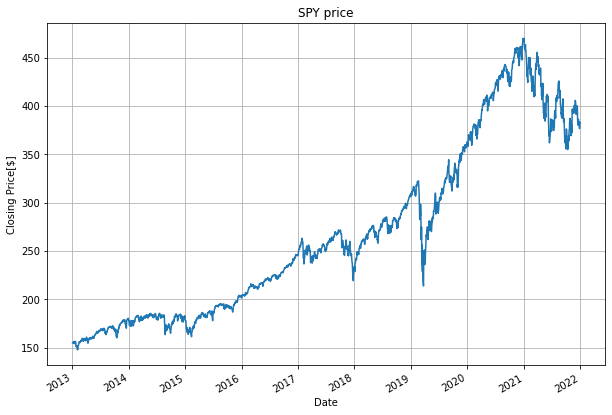

In [7]:
hist['Close'].plot(title='SPY price', ylabel='Closing Price[$]', figsize=[10,7])
plt.grid()

In [8]:
days = [i for i in range(1, len(hist['Close']) + 1)]
price_orig = hist['Close'].tolist()
change = hist['Close'].pct_change().tolist()
change = change[1:]  # remove first term (NaN)

mean = np.mean(change)
std_dev = np.std(change)
print('\nMean % change: ' + str(round(mean*100,2)) + '%')
print('Standard Deviation of % change: ' + str(round(std_dev*100,2)) + '%')


Mean % change: 0.05%
Standard Deviation of % change: 1.13%


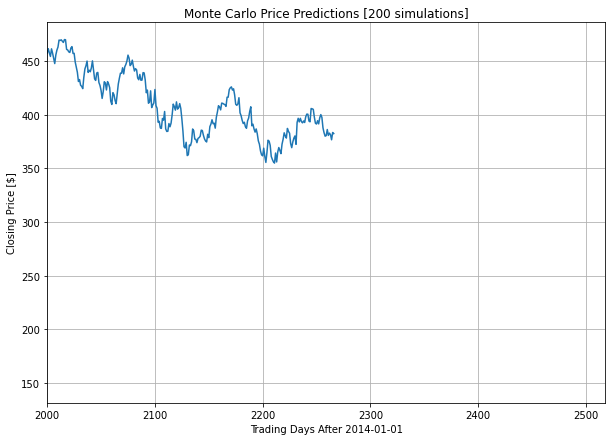

In [9]:
# Simulation # and prediction period

simulations = 200  # change for more results
days_to_sim = 1*252  # trading days / year

fig = plt.figure(figsize=[10,7])
plt.plot(days, price_orig)
plt.title('Monte Carlo Price Predictions [' + str(simulations) + ' simulations]')
plt.xlabel('Trading Days After ' + start_date)
plt.ylabel('Closing Price [$]')
plt.xlim([2000, len(days) + days_to_sim])
plt.grid()

close_end = []
above_close = []

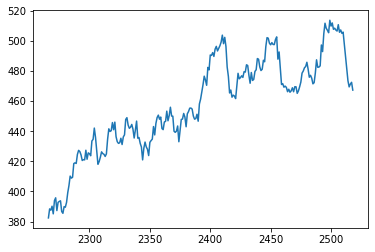

In [16]:
for i in range(simulations):
   num_days = [days[-1]]
   close_price = [hist.iloc[-1,0]]

   for j in range(days_to_sim):
     num_days.append(num_days[-1] + 1)
     perc_change = norm.ppf(random(), loc=mean, scale=std_dev)
     close_price.append(close_price[-1]*(1 + perc_change))

     if close_price[-1] > price_orig[-1]:
       above_close.append(1)
     else:
        above_close.append(0)

close_end.append(close_price[-1])
plt.plot(num_days, close_price)

In [18]:

avg_closing_price = sum(close_end)/simulations
avg_perc_change = (avg_closing_price - price_orig[-1])/price_orig[-1]

prob_of_increase = sum(above_close)/simulations
print('\nPredicted closing price after ' + str(simulations) + ' simulations: $' + str(round(avg_closing_price, 2)))
print('Predicted percent increase after 1-year: ' + str(round(avg_perc_change*100,2)) + '%')
print('Probability of stock price increasing after 1-year: ' + str(round(prob_of_increase)))

plt.show()


Predicted closing price after 200 simulations: $2.34
Predicted percent increase after 1-year: -99.39%
Probability of stock price increasing after 1-year: 170
